In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/10


c:\Python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 3s 6ms/step - loss: 22974162318393344.0000 - val_loss: 14617880297472.0000
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 7723966529536.0000 - val_loss: 3417093177344.0000
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 1805567131648.0000 - val_loss: 798785142784.0000
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 422071730176.0000 - val_loss: 186725253120.0000
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 98664177664.0000 - val_loss: 43649105920.0000
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 23063830528.0000 - val_loss: 10203471872.0000
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 5391436288.0000 - val_loss: 2385182208.0000
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: 1260309504.0000 - val_loss: 557564992.0000
Epoch 9/10
363/363 [==================

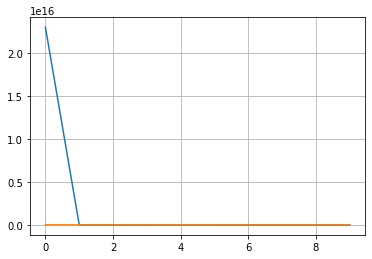

In [6]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(scaler.transform(X_train), y_train, epochs=10, validation_data=(scaler.transform(X_valid), y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = scaler.transform(X_test[:3])
y_pred = model.predict(X_new)

Epoch 1/10


c:\Python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 3s 7ms/step - loss: 1.8737 - val_loss: 0.7688
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6360 - val_loss: 0.6091
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5649 - val_loss: 0.5705
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5354 - val_loss: 0.5174
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5143 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4965 - val_loss: 0.4710
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4821 - val_loss: 0.4634
Epoch 8/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4702 - val_loss: 0.4442
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4602 - val_loss: 0.4338
Epoch 10/10
162/162 [==============================] - 1s 3ms/step - loss: 94819.1797


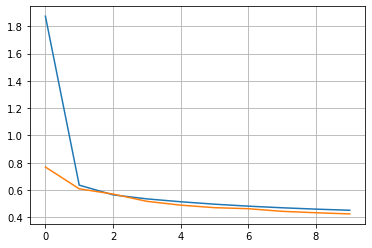

In [10]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Dane zawsze muszą być przeskalowane